In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls

drive  sample_data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, callbacks, models
from sklearn import model_selection
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv('/content/drive/MyDrive/age_gender_race/age_gender.csv')

In [5]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
data_df = data.copy()

**Convert pixels column into numpy array**

In [7]:
data_df['pixels'] = data_df['pixels'].apply(lambda x: np.array(x.split(" "), dtype="float32"))
data_df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


**Normalize the data**

In [8]:
data_df['pixels'] = data_df['pixels'].apply(lambda x: x/255)
data_df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[0.75686276, 0.77254903, 0.7764706, 0.78431374..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ..."


**Exploratory data analysis**

In [9]:
data_df.dtypes

age           int64
ethnicity     int64
gender        int64
img_name     object
pixels       object
dtype: object

In [10]:
age_index = data_df['age'].value_counts().index
age_values = data_df['age'].value_counts().values

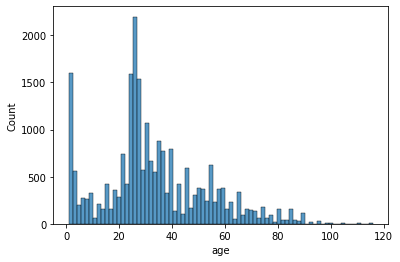

In [11]:
sns.histplot(data=data_df['age'])

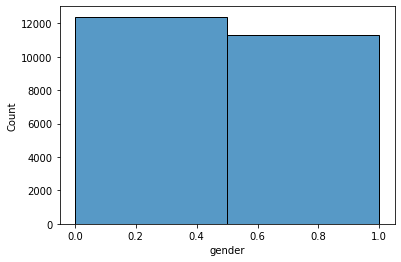

In [12]:
sns.histplot(data=data_df['gender'], bins=2)

In [13]:
data_df['ethnicity'].nunique()

5

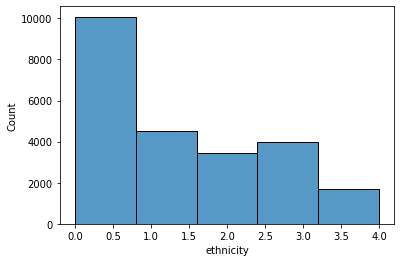

In [14]:
sns.histplot(data=data_df['ethnicity'], bins=5)

**Reshaping images**

In [15]:
X = data_df['pixels']
X

0        [0.5058824, 0.5019608, 0.5019608, 0.49411765, ...
1        [0.6431373, 0.2901961, 0.43529412, 0.65882355,...
2        [0.2627451, 0.27450982, 0.2784314, 0.27450982,...
3        [0.75686276, 0.77254903, 0.7764706, 0.78431374...
4        [0.7921569, 0.8039216, 0.81960785, 0.8235294, ...
                               ...                        
23700    [0.49803922, 0.39215687, 0.36862746, 0.3176470...
23701    [0.09019608, 0.10980392, 0.1254902, 0.13725491...
23702    [0.23137255, 0.19607843, 0.14509805, 0.1568627...
23703    [0.1764706, 0.42352942, 0.47058824, 0.6117647,...
23704    [0.6117647, 0.6313726, 0.627451, 0.64705884, 0...
Name: pixels, Length: 23705, dtype: object

In [16]:
X_array = np.array(data_df['pixels'])
X_array

array([array([0.5058824 , 0.5019608 , 0.5019608 , ..., 0.57254905, 0.57254905,
              0.57254905], dtype=float32)                                     ,
       array([0.6431373 , 0.2901961 , 0.43529412, ..., 0.7137255 , 0.6666667 ,
              0.5803922 ], dtype=float32)                                     ,
       array([0.2627451 , 0.27450982, 0.2784314 , ..., 0.4392157 , 0.43529412,
              0.42352942], dtype=float32)                                     ,
       ...,
       array([0.23137255, 0.19607843, 0.14509805, ..., 0.38431373, 0.30588236,
              0.30588236], dtype=float32)                                     ,
       array([0.1764706 , 0.42352942, 0.47058824, ..., 0.1254902 , 0.13725491,
              0.13725491], dtype=float32)                                     ,
       array([0.6117647 , 0.6313726 , 0.627451  , ..., 0.74509805, 0.72156864,
              0.68235296], dtype=float32)                                     ],
      dtype=object)

In [17]:
X_list = np.array(data_df['pixels'].tolist())
X_list

array([[0.5058824 , 0.5019608 , 0.5019608 , ..., 0.57254905, 0.57254905,
        0.57254905],
       [0.6431373 , 0.2901961 , 0.43529412, ..., 0.7137255 , 0.6666667 ,
        0.5803922 ],
       [0.2627451 , 0.27450982, 0.2784314 , ..., 0.4392157 , 0.43529412,
        0.42352942],
       ...,
       [0.23137255, 0.19607843, 0.14509805, ..., 0.38431373, 0.30588236,
        0.30588236],
       [0.1764706 , 0.42352942, 0.47058824, ..., 0.1254902 , 0.13725491,
        0.13725491],
       [0.6117647 , 0.6313726 , 0.627451  , ..., 0.74509805, 0.72156864,
        0.68235296]], dtype=float32)

In [18]:
X_list.shape

(23705, 2304)

**Found the number of pixels / size of image by taking the square root of the length of each array - assumed one channel (black and white images)**

In [19]:
X = np.reshape(X_list, (23705, 48, 48, 1))

In [20]:
X.shape

(23705, 48, 48, 1)

**Plot of faces**

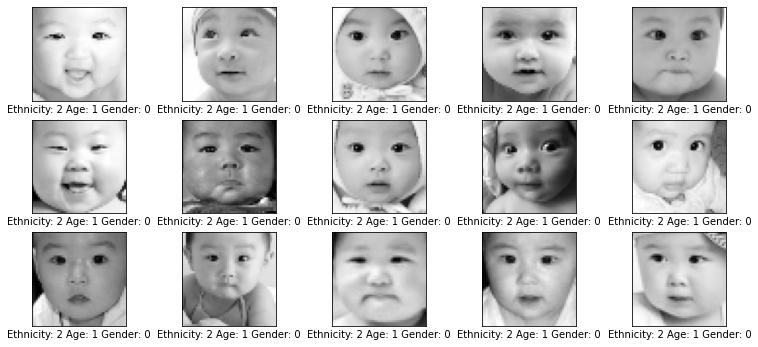

In [53]:
fig = plt.figure(figsize=(13,10))
for i in range(10, 25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(data_df.pixels.iloc[i].reshape(48, 48), cmap=plt.cm.gray)
    plt.xlabel(f"Ethnicity: {data_df.ethnicity.iloc[i]} Age: {data_df.age.iloc[i]} Gender: {data_df.gender.iloc[i]}")
    plt.xticks(()); plt.yticks(())

**Establish targets**

In [22]:
Y_1 = data_df.ethnicity
Y_2 = data_df.age
Y_3 = data_df.gender

**Ethnicity model**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_1, train_size=0.7)

In [24]:
model_ethnicity = Sequential()

model_ethnicity.add(layers.Conv2D(16, (4,4), input_shape=(48, 48, 1), activation="relu"))
model_ethnicity.add(layers.MaxPool2D(pool_size=(2,2)))
model_ethnicity.add(layers.Dropout(rate=0.4))

model_ethnicity.add(layers.Conv2D(32, (2,2), activation="relu"))
model_ethnicity.add(layers.MaxPool2D(pool_size=(2,2)))
model_ethnicity.add(layers.Dropout(rate=0.2))

model_ethnicity.add(layers.Flatten())
model_ethnicity.add(layers.Dense(50, activation="relu")) # intermediate layer
model_ethnicity.add(layers.Dense(5, activation="softmax"))

model_ethnicity.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 45, 45, 16)        272       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0

In [25]:
model_ethnicity.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model_ethnicity.fit(X_train, y_train,
          epochs= 20,
          verbose= 1,
          callbacks=[es],
          validation_split=0.2,
          batch_size= 32)

Epoch 1/20
415/415 [==============================] - 15s 8ms/step - loss: 1.2601 - accuracy: 0.5044 - val_loss: 1.0531 - val_accuracy: 0.6442
Epoch 2/20
415/415 [==============================] - 4s 9ms/step - loss: 0.9629 - accuracy: 0.6477 - val_loss: 0.8940 - val_accuracy: 0.6966
Epoch 3/20
415/415 [==============================] - 3s 8ms/step - loss: 0.8907 - accuracy: 0.6810 - val_loss: 0.8391 - val_accuracy: 0.7231
Epoch 4/20
415/415 [==============================] - 3s 7ms/step - loss: 0.8492 - accuracy: 0.6962 - val_loss: 0.8312 - val_accuracy: 0.7177
Epoch 5/20
415/415 [==============================] - 4s 9ms/step - loss: 0.8059 - accuracy: 0.7121 - val_loss: 0.7854 - val_accuracy: 0.7346
Epoch 6/20
415/415 [==============================] - 4s 9ms/step - loss: 0.7867 - accuracy: 0.7194 - val_loss: 0.7725 - val_accuracy: 0.7382
Epoch 7/20
415/415 [==============================] - 2s 5ms/step - loss: 0.7742 - accuracy: 0.7272 - val_loss: 0.7587 - val_accuracy: 0.7367
Epoch

In [27]:
print(model_ethnicity.evaluate(X_test, y_test, verbose=0))

[0.6840109825134277, 0.7594206929206848]


In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


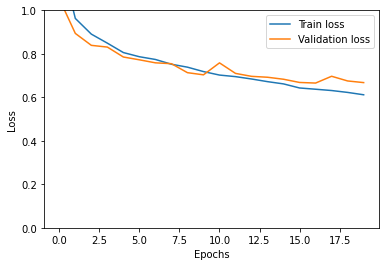

In [29]:
plt.plot(figsize=(16,8))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0,1)
plt.legend()

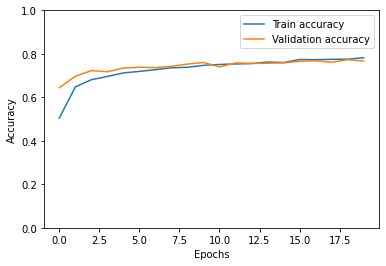

In [30]:
plt.plot(figsize=(16,8))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.legend()

In [31]:
models.save_model(model_ethnicity, 'ethnicity_model')

INFO:tensorflow:Assets written to: ethnicity_model/assets


**Age model - linear regression task**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_2, train_size=0.7)

In [33]:
model_age = Sequential()

model_age.add(layers.Conv2D(16, (4,4), input_shape=(48, 48, 1), activation="relu"))
model_age.add(layers.MaxPool2D(pool_size=(2,2)))
model_age.add(layers.Dropout(rate=0.2))

model_age.add(layers.Conv2D(32, (2,2), activation="relu"))
model_age.add(layers.MaxPool2D(pool_size=(2,2)))
model_age.add(layers.Dropout(rate=0.2))

model_age.add(layers.Flatten())
model_age.add(layers.Dense(50, activation="relu")) # intermediate layer
model_age.add(layers.Dense(1, activation="linear"))

model_age.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 45, 45, 16)        272       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 32)        2080      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 10, 10, 32)       

In [34]:
model_age.compile(loss='mse',
              optimizer='adam')

In [35]:
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model_age.fit(X_train, y_train,
          epochs= 20,
          verbose= 1,
          callbacks=[es],
          validation_split=0.2,
          batch_size= 32)

Epoch 1/20
415/415 [==============================] - 3s 5ms/step - loss: 427.2310 - val_loss: 492.9555
Epoch 2/20
415/415 [==============================] - 2s 4ms/step - loss: 303.1982 - val_loss: 286.0980
Epoch 3/20
415/415 [==============================] - 2s 4ms/step - loss: 244.9907 - val_loss: 260.1156
Epoch 4/20
415/415 [==============================] - 2s 4ms/step - loss: 219.1069 - val_loss: 229.8025
Epoch 5/20
415/415 [==============================] - 2s 4ms/step - loss: 202.2804 - val_loss: 210.5135
Epoch 6/20
415/415 [==============================] - 2s 4ms/step - loss: 192.8434 - val_loss: 196.1660
Epoch 7/20
415/415 [==============================] - 2s 4ms/step - loss: 182.0954 - val_loss: 179.9984
Epoch 8/20
415/415 [==============================] - 2s 4ms/step - loss: 175.6536 - val_loss: 186.2153
Epoch 9/20
415/415 [==============================] - 2s 4ms/step - loss: 169.7286 - val_loss: 180.3469
Epoch 10/20
415/415 [==============================] - 2s 4ms/st

**Age model results**

In [36]:
predicted_ages = np.squeeze(model_age.predict(X_test))

rmse = np.sqrt(model_age.evaluate(X_test))
print(f"RMSE:{rmse}")

r2 = r2_score(y_test, predicted_ages)
print(f"r2 score:{r2}")


223/223 [==============================] - 0s 2ms/step - loss: 0.0000e+00
RMSE:0.0
r2 score:0.6932608391039949


In [37]:
models.save_model(model_age, 'age_model')

INFO:tensorflow:Assets written to: age_model/assets


**Gender model**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_3, train_size=0.7)

In [39]:
model_gender = Sequential()

model_gender.add(layers.Conv2D(16, (4,4), input_shape=(48, 48, 1), activation="relu"))
model_gender.add(layers.MaxPool2D(pool_size=(2,2)))
model_gender.add(layers.Dropout(rate=0.4))

model_gender.add(layers.Conv2D(32, (2,2), activation="relu"))
model_gender.add(layers.MaxPool2D(pool_size=(2,2)))
model_gender.add(layers.Dropout(rate=0.2))

model_gender.add(layers.Flatten())
model_gender.add(layers.Dense(50, activation="relu")) # intermediate layer
model_gender.add(layers.Dense(1, activation="sigmoid"))

model_gender.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 45, 45, 16)        272       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 32)        2080      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 10, 10, 32)       

In [40]:
model_gender.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model_gender.fit(X_train, y_train,
          epochs= 20,
          verbose= 1,
          callbacks=[es],
          validation_split=0.2,
          batch_size= 32)

Epoch 1/20
415/415 [==============================] - 3s 5ms/step - loss: 0.5604 - accuracy: 0.7078 - val_loss: 0.4647 - val_accuracy: 0.8048
Epoch 2/20
415/415 [==============================] - 3s 6ms/step - loss: 0.4308 - accuracy: 0.8053 - val_loss: 0.3819 - val_accuracy: 0.8274
Epoch 3/20
415/415 [==============================] - 3s 6ms/step - loss: 0.3845 - accuracy: 0.8192 - val_loss: 0.3558 - val_accuracy: 0.8457
Epoch 4/20
415/415 [==============================] - 2s 5ms/step - loss: 0.3613 - accuracy: 0.8345 - val_loss: 0.3505 - val_accuracy: 0.8469
Epoch 5/20
415/415 [==============================] - 2s 5ms/step - loss: 0.3473 - accuracy: 0.8371 - val_loss: 0.3240 - val_accuracy: 0.8590
Epoch 6/20
415/415 [==============================] - 2s 5ms/step - loss: 0.3366 - accuracy: 0.8479 - val_loss: 0.3132 - val_accuracy: 0.8620
Epoch 7/20
415/415 [==============================] - 2s 5ms/step - loss: 0.3269 - accuracy: 0.8519 - val_loss: 0.3042 - val_accuracy: 0.8653
Epoch 

In [42]:
print(model_gender.evaluate(X_test, y_test, verbose=0))

[0.2667713165283203, 0.886529803276062]


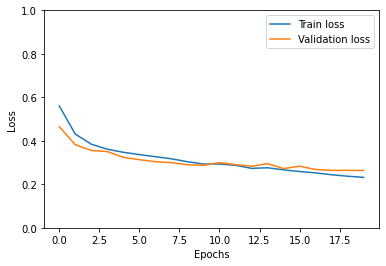

In [43]:
plt.plot(figsize=(16,8))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0,1)
plt.legend()

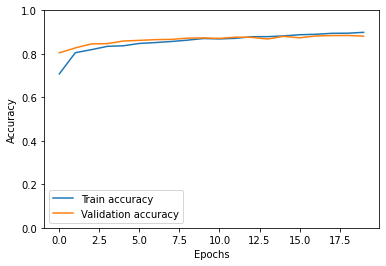

In [44]:
plt.plot(figsize=(16,8))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.legend()

**Validating our model with Johnny Wilkinson image**

In [45]:
import skimage.io
from skimage.transform import resize

In [46]:
def read_img(filepath):
  return skimage.io.imread(filepath,as_gray=True)

def resize_image(input_image):
  img = read_img(input_image)
  img = resize(img,(1,48,48,1))
  return img

In [48]:
johnny = resize_image('/content/drive/MyDrive/johnny_wilkinson.jpg')
johnny = johnny/255

In [49]:
model_gender.predict(johnny)

array([[0.3599377]], dtype=float32)

In [50]:
model_age.predict(johnny)

array([[30.31405]], dtype=float32)

In [52]:
model_ethnicity.predict(johnny)

array([[0.2523638 , 0.3079198 , 0.19001704, 0.12749673, 0.12220255]],
      dtype=float32)